# Assignment 2 - Unsupervised Learning 
`

In [ ]:
! git clone https://github.com/Basirulislam/Assignment_2.git


In [ ]:
! git add -A 


In [ ]:
! git commit -am "Moving the Jupyter notebook" 


In [ ]:
! git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

#### Task 1 (3 points):

1. Data normalization
    - Look at features of Linnerud dataset, tell what is the problem with them
          from sklearn.datasets import load_linnerud
    - Normalize these features using a correct method. Plot original vs normalized probability density.

In [1]:
import pandas as pd

import numpy as np
import mglearn
%matplotlib inline

In [ ]:
from sklearn.datasets import load_linnerud

data = load_linnerud()
df_data = pd.DataFrame(data.data, columns=data.feature_names)


# Descriptive statistics of the DataFrame

df_data.describe().transpose()

Some algorithms are very sensitive to the scaling of data such as SVM and NNs, because they aassume that all features are centered around zero and have variance in the same order. We can see that the features in our dataset have mean values that are positive. The std values vary between the features, so that can cause issues in a model as well. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_data)
Dataset_scaled = scaler.transform(df_data)

Dataset_scaled = pd.DataFrame(Dataset_scaled)
Dataset_scaled.describe().transpose()

In [ ]:
hist_before = df_data.hist(bins=5)

In [ ]:
hist_scaled = Dataset_scaled.hist(bins=5)

#### Task 2 (4 points):  
2. Dimensionality reduction
    - Load 20 News Dataset
          from sklearn.datasets import fetch_20newsgroups_vectorized
          data = fetch_20newsgroups_vectorized(subset='train')
    - Use KernelPCA for dimensionality reduction. Train a classifier at different nr of dimensions, check how model score changes with dimensions
          Remember that you can load training and testing subsets of data!

In [2]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn import datasets
from sklearn.utils import shuffle


bunch_train = datasets.fetch_20newsgroups_vectorized(subset='train',as_frame = True)
bunch_test = datasets.fetch_20newsgroups_vectorized(subset='test',as_frame = True)
y_train = bunch_train.target
y_test = bunch_test.target

In [3]:
# we scale our data using MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(bunch_train.data)
X_train_scaled = scaler.transform(bunch_train.data)
X_test_scaled = scaler.transform(bunch_test.data)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
t0 = time()
n_components = [10,100,500]
col = ['train', 'test']
score = pd.DataFrame(columns = col, index= n_components)


# fit kPCA model to 20newsgroupsdata
for number in range(0, len(n_components)):
    # keep the first n principal components of the data
    kpca = KernelPCA(n_components=n_components[number])

    kpca.fit(X_train_scaled)
    # transform data onto the first n principal components
    X_train_kpca = kpca.transform(X_train_scaled)
    X_test_kpca = kpca.transform(X_test_scaled)

    logr_news = LogisticRegression(solver='sag').fit(X_train_kpca, y_train)
    # Calculate R-squared for both test / train samples
    score.at[n_components[number],'train'] = round(logr_news.score(X_train_kpca,y_train),3)
    score.at[n_components[number],'test'] = round(logr_news.score(X_test_kpca,y_test),3)
    

print("done in %fs" % (time() - t0))
print(score)

C:\Users\alext\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\alext\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\alext\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,train,test
10,0.102,0.1
100,0.6,0.528
500,0.855,0.742


#### Task 3 (8 points):

3. Clustering
    - Cluster 20 News Dataset into 20 clusters. Print true class vs cluster distribution. 
          Did you manage to recover the original clusters?  (give students an example plot)

20 News Groups dataset

In [4]:
from sklearn.datasets import fetch_20newsgroups_vectorized
data = fetch_20newsgroups_vectorized(subset='train', remove=('headers','footers','quotes'))
X = data['data']
Y = data['target']

Printing classes and their predictions

In [52]:
from sklearn.cluster import KMeans, MiniBatchKMeans


kmeans = KMeans(n_clusters=20)
clusters = kmeans.fit_predict(X)

res = list(zip(*np.unique(clusters, return_counts=True)))
res

[(0, 316),
 (1, 782),
 (2, 1202),
 (3, 244),
 (4, 1182),
 (5, 112),
 (6, 326),
 (7, 457),
 (8, 514),
 (9, 615),
 (10, 589),
 (11, 376),
 (12, 564),
 (13, 806),
 (14, 831),
 (15, 425),
 (16, 473),
 (17, 493),
 (18, 363),
 (19, 644)]

<AxesSubplot:>

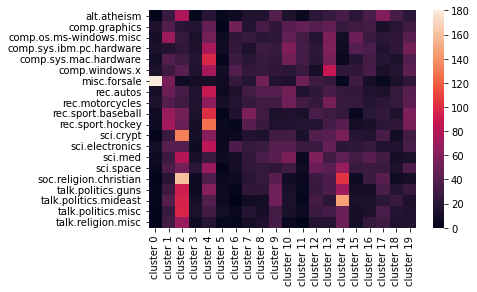

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(Y, clusters)
sn.heatmap(cm, yticklabels=data['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])

In [50]:
kmeans = MiniBatchKMeans(n_clusters=20, init='k-means++', n_init=500)
clusters = kmeans.fit_predict(X_train_kpca)

res = list(zip(*np.unique(clusters, return_counts=True)))
res

[(0, 1124),
 (1, 19),
 (2, 2),
 (3, 11),
 (4, 2),
 (5, 42),
 (6, 29),
 (7, 3),
 (8, 3468),
 (9, 12),
 (10, 7),
 (11, 4217),
 (12, 1102),
 (13, 1),
 (14, 15),
 (15, 8),
 (16, 24),
 (17, 3),
 (18, 1214),
 (19, 11)]

<AxesSubplot:>

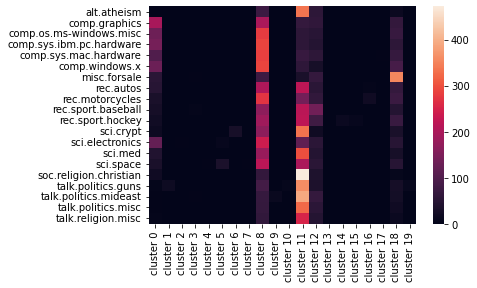

In [51]:
cm = confusion_matrix(Y, clusters)
sn.heatmap(cm, yticklabels=data['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])